# Modelling - Transformed Data

## Import Cleaned Data

__DataFrames:__  
df_model - df with all the features (independent festures + Target)  
x - df with all independent features
y - df with dependent feature  
x_train - df with training data from x  
x_train_out - df with training data from x with outliers treatment applied  
x_test - df with test data from x  
x_test_out - df with test data from x with outliers treatment applied  



Nr of rows:
72538


<Figure size 432x288 with 0 Axes>

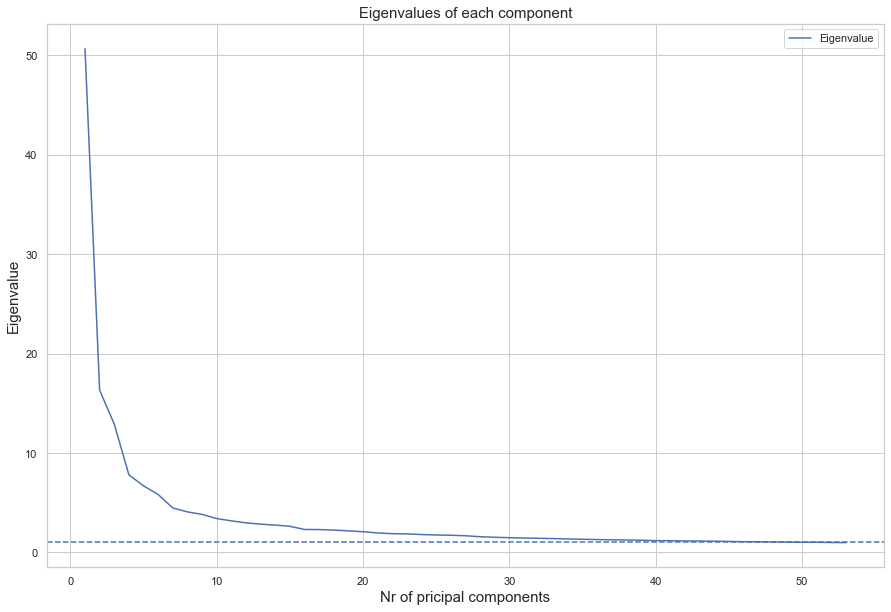

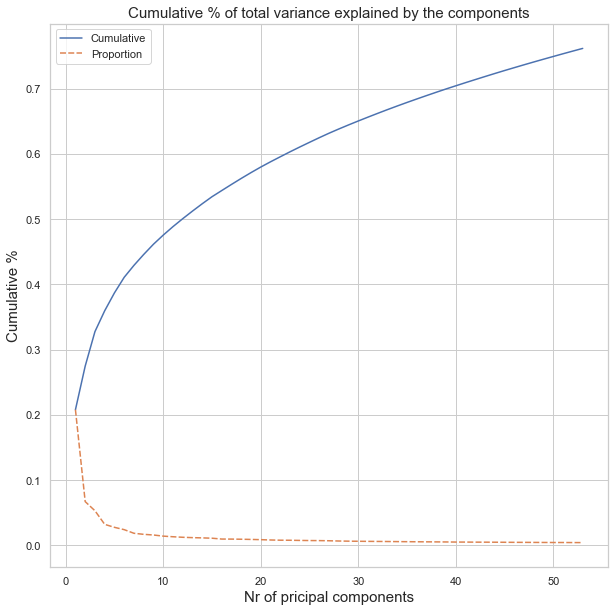

The variance explained by each component is: [50.70262543 16.3180414  12.90616231  7.80559243  6.69692605  5.82614766
  4.47015907  4.07836541  3.82626867  3.40508117  3.17395217  2.97398597
  2.84255924  2.7491931   2.6284572   2.30920491  2.29580116  2.24676716
  2.1685526   2.08344875  1.96058327  1.88331954  1.85945512  1.79999003
  1.75303096  1.72999438  1.67342676  1.57892838  1.52235707  1.48115797
  1.44613583  1.42029951  1.39091026  1.35520895  1.32448072  1.29342424
  1.27059382  1.25051426  1.2247642   1.18608517  1.17810508  1.15156743
  1.14454538  1.12935887  1.10669478  1.0815426   1.07222534  1.05458183
  1.03848544  1.01988948  1.01877496  0.99533768  0.98807987]
The total variance explained by the components is: 0.7618344466001967


In [10]:
import sys
sys.path.insert(1, r'C:\Users\rafae\Personal\Github\Functions\Data-Science-Functions')
sys.path.insert(2, r'C:\Users\rafae\Personal\Github\Functions\Data-Science-Functions\Functions')
sys.path.insert(3, r'..\..\..')

import Visualizations_Functions as viz 
import Classification_CV as class_cv
import DataPreparation as preprocess 
import FeatureExtraction as ft_extract 
import DataScalling as scalling
import FeatureSelection as ft_selection
import importCleanedData as importData
import importCleanedData_Orig as importDataOrig
import importSubsets as subsets

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from tensorflow import keras

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

#set preferences
sns.set_style('whitegrid')

#set color for graphs
#set color for graphs
palette = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3"]


dir = r'..\..\..\SampleData\Sample'
# df_model_skew,df_target = importData.importCleanedData(dir=dir,target='CAPM')
df_model_skew,df_target = importData.importCleanedData_skew(dir=dir,)


#split data
date = '2018-01-01'
#split data without transformation
x_train,x_train_out,x_test, x_test_out,y_train_dict ,y_test_dict, y_train,y_test = importData.splitData_(df_model_skew, date) 


#set columns
ratio_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Ratio'))]
shares_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Share'))]
margin_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Margin'))]
turnover_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Turnover'))]
dividend_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('dividend'))]


tran_component, test_components = importData.runPCA(x_train_out= x_train_out,x_test = x_test)



def import_folderData_csv_file (path):
    import os
    import glob
    import time 
    import pandas as pd 
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    df = pd.DataFrame()
    for file in csv_files:
        df_temp = pd.read_csv(file)
        df_temp['file'] = file
        df = pd.concat([df, df_temp], axis=0)
        
        
    return(df)


#import subsets
lasso_subset_0, lasso_subset_15, mi_subset_0, mi_subset_15, lgb_subset, corr_subset0, corr_subset15 = subsets.importSubsets()

## Final Subsets

In [12]:
subset_0 = ['revenue',
 'costOfRevenue',
 'otherExpenses',
 'interestIncome',
 'weightedAverageShsOut',
 'cashAndShortTermInvestments',
 'otherCurrentAssets',
 'totalCurrentAssets',
 'goodwill',
 'intangibleAssets',
 'longTermInvestments',
 'otherAssets',
 'deferredRevenue',
 'otherCurrentLiabilities',
 'deferredRevenueNonCurrent',
 'totalNonCurrentLiabilities',
 'capitalLeaseObligations',
 'preferredStock',
 'totalInvestments',
 'netIncome_cf',
 'depreciationAndAmortization_cf',
 'deferredIncomeTax',
 'stockBasedCompensation',
 'inventory_cf',
 'netCashProvidedByOperatingActivities',
 'salesMaturitiesOfInvestments',
 'otherFinancingActivites',
 'effectOfForexChangesOnCash',
 'daysOfPayablesOutstanding',
 'netProfitMargin',
 'freeCashFlowPerShare',
 'capitalExpenditureCoverageRatio',
 'priceEarningsRatio',
 'close',
 'totalDividend',
 'operatingIncome_TTM',
 'eps_TTM',
 'YoY_ebitda',
 'YoY_operatingIncome',
 'YoY_eps']
subset_15 =  ['revenue',
 'costOfRevenue',
 'generalAndAdministrativeExpenses',
 'sellingAndMarketingExpenses',
 'interestIncome',
 'operatingIncome',
 'weightedAverageShsOut',
 'cashAndShortTermInvestments',
 'otherCurrentAssets',
 'totalCurrentAssets',
 'goodwill',
 'taxAssets',
 'totalAssets',
 'accountPayables',
 'longTermDebt',
 'deferredRevenueNonCurrent',
 'deferredTaxLiabilitiesNonCurrent',
 'capitalLeaseObligations',
 'commonStock',
 'netIncome_cf',
 'depreciationAndAmortization_cf',
 'deferredIncomeTax',
 'commonStockIssued',
 'effectOfForexChangesOnCash',
 'freeCashFlow',
 'daysOfInventoryOutstanding',
 'daysOfPayablesOutstanding',
 'companyEquityMultiplier',
 'operatingCashFlowPerShare',
 'capitalExpenditureCoverageRatio',
 'priceEarningsRatio',
 'priceEarningsToGrowthRatio',
 'close',
 'totalDividend',
 'researchAndDevelopmentExpenses_TTM',
 'YoY_netIncome']

susbet_corr_0 = ['Volatility_63', 'Volatility_42', 'Volatility_84', 'Volatility_21',
       'close', 'netProfitMargin_bin', 'netIncome_bin', 'priceToSalesRatio',
       'priceSalesRatio', 'capitalExpenditureCoverageRatio',
       'sector_priceEarningsRatio_bin', 'industry_Biotechnology',
       'excessReturn_42', 'currentRatio', 'industry_Electronic Components',
       'returnOnCapitalEmployed', 'operatingCashFlowSalesRatio',
       'netCashProvidedByOperatingActivities', 'operatingCashFlow',
       'pretaxProfitMargin', 'incomeBeforeTaxRatio', 'ebitPerRevenue',
       'operatingProfitMargin', 'operatingIncomeRatio', 'netIncomeRatio',
       'netProfitMargin', 'eps', 'epsdiluted', 'returnOnEquity']

subset_corr_15 = ['close', 'dividend', 'totalAssets', 'eps_TTM', 'dividendYield',
       'netIncome_TTM', 'earnings_TTM', 'totalDividend', 'ebitda_TTM',
       'dividendPayoutRatio', 'mktcap', 'payoutRatio', 'ebit',
       'retainedEarnings', 'netIncome_cf', 'daysOfInventoryOutstanding',
       'grossProfitMargin', 'fixedAssetTurnover', 'daysOfPayablesOutstanding',
       'payablesTurnover', 'dividendsPaid', 'marketcap_bin', 'assetTurnover',
       'sector_priceEarningsRatio_bin', 'netProfitMargin_bin', 'netIncome_bin',
       'Volatility_21', 'Volatility_42', 'Volatility_63']


# __Grid Search__

## __Target 0__

### Perfomance Metric: Accuracy

#### Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0,)


params = {'max_depth':[2,4,6,8],
         'max_features':[2,3,4,5,6,7,8,9],
         'criterion':['gini','entropy'],
         'min_samples_leaf':[2,5,10,50,100]}

dt_gs_0 = class_cv.grid_search(model = model,
                                params = params,
                                x_train = x_train_out[subset_0],
                                y_train = y_train_dict['Target_0'],
                                x_val = x_test_out[subset_0],
                                y_val = y_test_dict['Target_0'],
                               metric = 'accuracy',
                               n_splts=2)

Performing Grid Search
Perfomance metric accuracy
Optimizing: DecisionTreeClassifier(random_state=0)
Cross Validation: stratKfold
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.53      0.40      0.46     25335
        True       0.55      0.67      0.60     27235

    accuracy                           0.54     52570
   macro avg       0.54      0.54      0.53     52570
weighted avg       0.54      0.54      0.53     52570

[[10176 15159]
 [ 8873 18362]]
___________________________________________________________________________________________________________
                                                VALIDATION                      

##### Test GS

In [10]:
model = DecisionTreeClassifier(max_depth=4,
                               max_features=8,
                               min_samples_leaf=50,
                       random_state=0)

dt_assess = class_cv.validateModel(x_train_out[subset_0],
                      y_train_dict['Target_0'],
                      model=model ,
                      scaler=False,
                        over_sampling=False,
                        predictions=False,
                        cv_type='stratKfold',
                        scaler_type='stand',
                        train_size=10,
                        test_size=1,
                        gap=0)

stratKfold
Nr of splits: 10
accuracy_train     0.536404
f1_train           0.612953
recall_train       0.719654
precision_train    0.540622
auc_train          0.529533
accuracy_test      0.521058
f1_test            0.608248
recall_test        0.726896
precision_test     0.528043
auc_test           0.513338
dtype: float64


#### Light Gradient Boosterm

In [4]:
model = lgb.LGBMClassifier(random_state = 0,)
params = {'max_depth':[2,4,6,8,10],
         'n_estimators':[10,50,100,200],
         'learning_rate':[0.001,0.05,0.1,0.2],
         'boosting_type':['gbdt','dart']}

lgb_gs_0 = class_cv.grid_search(model = model,
                    params = params,
                     x_train = x_train_out[subset_0],
                     y_train = y_train_dict['Target_0'],
                     x_val = x_test_out[subset_0],
                     y_val = y_test_dict['Target_0'],
                      metric = 'accuracy',
                               n_splts=2)

Performing Grid Search
Perfomance metric accuracy
Optimizing: LGBMClassifier(random_state=0)
Cross Validation: stratKfold
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.57      0.41      0.48     25335
        True       0.57      0.71      0.63     27235

    accuracy                           0.57     52570
   macro avg       0.57      0.56      0.55     52570
weighted avg       0.57      0.57      0.56     52570

[[10496 14839]
 [ 7953 19282]]
___________________________________________________________________________________________________________
                                                VALIDATION                              

##### Test GS

In [15]:
model = lgb.LGBMClassifier(learning_rate=0.2, max_depth=2, n_estimators=50, random_state=0)

lgb_assess = class_cv.validateModel(x_train_out[subset_0],
                      y_train_dict['Target_0'],
                      model=model ,
                      scaler=False,
                        over_sampling=False,
                        predictions=False,
                        cv_type='stratKfold',
                        scaler_type='stand',
                        train_size=10,
                        test_size=1,
                        gap=0)

stratKfold
Nr of splits: 10
accuracy_train     0.566413
f1_train           0.629307
recall_train       0.710422
precision_train    0.564846
auc_train          0.561013
accuracy_test      0.543085
f1_test            0.609139
recall_test        0.690734
precision_test     0.546374
auc_test           0.537553
dtype: float64


#### Logistic Regression

In [11]:
model = LogisticRegression(random_state = 0,)

params = {'penalty' : ['l1', 'l2', 'elasticnet', None],
         'fit_intercept':[True, False],
         'solver':['lbfgs', 'liblinear',
                   'newton-cg', 'newton-cholesky',
                   'sag', 'saga'],}

lr_gs_15 = class_cv.grid_search(model = model,
                    params = params,
                     x_train = x_train_out[subset_0],
                     y_train = y_train_dict['Target_0'],
                     x_val = x_test_out[subset_0],
                     y_val = y_test_dict['Target_0'],
                       metric = 'accuracy',
                               n_splts=2)

Performing Grid Search
Perfomance metric accuracy
Optimizing: LogisticRegression(random_state=0)
Cross Validation: stratKfold
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.54      0.37      0.44     25335
        True       0.55      0.71      0.62     27235

    accuracy                           0.55     52570
   macro avg       0.55      0.54      0.53     52570
weighted avg       0.55      0.55      0.53     52570

[[ 9494 15841]
 [ 7941 19294]]
___________________________________________________________________________________________________________
                                                VALIDATION                          

##### Test GS

In [21]:
model = LogisticRegression(random_state=0,
                           solver='liblinear' )
lr_assess = class_cv.validateModel(x_train_out[subset_0],
                      y_train_dict['Target_0'],
                      model=model ,
                      scaler=True,
                        over_sampling=False,
                        predictions=False,
                        cv_type='stratKfold',
                        scaler_type='stand',
                        train_size=10,
                        test_size=1,
                        gap=0)

stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.547803
f1_train           0.618208
recall_train       0.706668
precision_train    0.549444
auc_train          0.541846
accuracy_test      0.538083
f1_test            0.608180
recall_test        0.695837
precision_test     0.541866
auc_test           0.532171
dtype: float64


##### With Standard Scaler

In [6]:
x_train_stand,x_test_stand = scalling.standardize_2(x_train_out[subset_0], x_test_out[subset_0])

model = LogisticRegression(random_state = 0,)

params = {'penalty' : ['l1', 'l2', 'elasticnet', None],
         'fit_intercept':[True, False],
         'solver':['lbfgs', 'liblinear',
                   'newton-cg', 'newton-cholesky',
                   'sag', 'saga'],}

lr_gs_0 = class_cv.grid_search(model = model,
                    params = params,
                     x_train = x_train_stand[subset_0],
                     y_train = y_train_dict['Target_0'],
                     x_val = x_test_stand,
                     y_val = y_test_dict['Target_0'],
                       metric = 'accuracy',
                               n_splts=2)

Performing Grid Search
Perfomance metric accuracy
Optimizing: LogisticRegression(random_state=0)
Cross Validation: stratKfold
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.54      0.37      0.44     25335
        True       0.55      0.71      0.62     27235

    accuracy                           0.55     52570
   macro avg       0.55      0.54      0.53     52570
weighted avg       0.55      0.55      0.53     52570

[[ 9474 15861]
 [ 7927 19308]]
___________________________________________________________________________________________________________
                                                VALIDATION                          

#### Test GS

In [14]:
model = LogisticRegression(penalty='l1', random_state=0, solver='saga' )
lr_assess = class_cv.validateModel(x_train_out[subset_0],
                      y_train_dict['Target_0'],
                      model=model ,
                      scaler=True,
                        over_sampling=False,
                        predictions=False,
                        cv_type='stratKfold',
                        scaler_type='stand',
                        train_size=10,
                        test_size=1,
                        gap=0)

stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.547699
f1_train           0.618287
recall_train       0.707068
precision_train    0.549328
auc_train          0.541723
accuracy_test      0.538178
f1_test            0.608401
recall_test        0.696351
precision_test     0.541909
auc_test           0.532250
dtype: float64


### Neural Network

#### MLP - SK-Learn

In [3]:
x_train_stand,x_test_stand = scalling.standardize_2(x_train_out[subset_0], x_test_out[subset_0])

model = MLPClassifier(random_state = 0,)

params = {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
         'solver':['lbfgs', 'sgd', 'adam'],
         'learning_rate':['constant', 'invscaling', 'adaptive'],
         'batch_size':[64, 128, 256, 512],
         'learning_rate_init':[0.001,0.01,0.1],
         'max_iter':[10,50,100,]
         }

lr_gs_0 = class_cv.grid_search(model = model,
                    params = params,
                     x_train = x_train_stand[subset_0],
                     y_train = y_train_dict['Target_0'],
                     x_val = x_test_stand,
                     y_val = y_test_dict['Target_0'],
                       metric = 'accuracy',
                               n_splts=2)

Performing Grid Search
Perfomance metric accuracy
Optimizing: MLPClassifier(random_state=0)
Cross Validation: stratKfold
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.54      0.54      0.54     25335
        True       0.57      0.57      0.57     27235

    accuracy                           0.56     52570
   macro avg       0.56      0.56      0.56     52570
weighted avg       0.56      0.56      0.56     52570

[[13678 11657]
 [11595 15640]]
___________________________________________________________________________________________________________
                                                VALIDATION                               

##### Test GS

In [4]:
model = MLPClassifier(activation='tanh', batch_size=64, learning_rate_init=0.01,
              max_iter=10, random_state=0, solver='sgd')
nn_assess = class_cv.validateModel(x_train_out[subset_0],
                      y_train_dict['Target_0'],
                      model=model ,
                      scaler=True,
                        over_sampling=False,
                        predictions=False,
                        cv_type='stratKfold',
                        scaler_type='stand',
                        train_size=10,
                        test_size=1,
                        gap=0)

stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.560279
f1_train           0.610419
recall_train       0.665108
precision_train    0.564209
auc_train          0.556349
accuracy_test      0.537816
f1_test            0.589157
recall_test        0.643477
precision_test     0.545428
auc_test           0.533858
dtype: float64


##### Set Network Architeture

In [4]:
def reset_random_seeds():
    import random
    from numpy.random import seed
    import os
    from tensorflow import random as r
    
    seed_nr = 0
    os.environ['PYTHONHASHSEED']=str(seed_nr)
    r.set_seed(seed_nr)
    np.random.seed(seed_nr)
    
    
def get_clf(meta, hidden_layer_sizes,activation_list, dropout, learning_rate_fn,opt):
    #get nr features in
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    
    opt = 'Adam'
    loss = 'BinaryCrossentropy'
    metrics = ['AUC','Recall','Precision']
    
    from scikeras.wrappers import KerasClassifier, KerasRegressor
    from tensorflow import keras
    model = keras.models.Sequential()
    #define input shape
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    
    #define hidden layers
    for hidden_layer_size, activation_ in zip(hidden_layer_sizes, activation_list):
        
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation_))
        model.add(keras.layers.Dropout(dropout))
    
    #define output layer
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    
    model.compile(optimizer='Adam',
                  loss='BinaryCrossentropy',
                  metrics=metrics)
    
    
    return model

def genKerasNN(loss = 'binary_crossentropy',hidden_layer_sizes = (100,), activation_list = ['relu'],optimizer = 'Adam', 
               metrics = 'classif',batch_size = 500,epochs = 10, dropout = 0.1, class_weight = None,initial_learning_rate = 0.1):
    from scikeras.wrappers import KerasClassifier, KerasRegressor
    from tensorflow import keras
    from tensorflow.keras.optimizers.schedules import ExponentialDecay
    
    if metrics == 'classif':
        
        metrics_ = ['accuracy', 'AUC','Recall','Precision']
        print(metrics_)
        
        
    initial_learning_rate = initial_learning_rate
    decay_rate = 0.96
    decay_steps = 200

    learning_rate_fn = ExponentialDecay(
        initial_learning_rate,
        decay_steps=decay_steps,
        decay_rate=decay_rate)
    reset_random_seeds()
        
    model = KerasClassifier(
                            build_fn=get_clf,
                            hidden_layer_sizes=hidden_layer_sizes,
                            activation_list =activation_list ,
                            dropout=dropout,
                            batch_size= batch_size,
                            opt = optimizer,
                            # loss=loss,
                            metrics_=metrics_,
                            class_weight=class_weight,
                            learning_rate_fn = learning_rate_fn,
                            epochs= epochs,
                            validation_split=0.25
                            
                            )
    
    return(model)

metrics = ['AUC','Recall','Precision']
NNmodel =  genKerasNN(
                   hidden_layer_sizes = (10,),
                   activation_list = ['LeakyReLU',],
                   optimizer = 'Adam',
                   batch_size = 128,
                   epochs = 100,
                   dropout = 0.1,
                   class_weight = 'balanced',
                   initial_learning_rate = 0.01)


def gen_NNClassification (x, y, hidden_layer_sizes,activation_list, dropout,optimizer,loss = 'BinaryCrossentropy', metrics = ['AUC'],batch_size=180,epochs=10,validation_split = 0.25, class_weight = None, output_bias =None ):
    
    print('Neural Network Parameters:')
    print(f'Optimizer: {optimizer}')
    print(f'Loss: {loss}')
    print(f'Hidden Layer structure: {hidden_layer_sizes}')
    print(f'Acivation Functions: {activation_list}')
    print(f'Dropout: {dropout}')
    print(f'Class Weight: {class_weight}')
    print(f'Output Bias: {output_bias}')
    
    #import libraries
    from scikeras.wrappers import KerasClassifier, KerasRegressor
    from tensorflow import keras
    
    #get nr features in
    n_features_in_ = x.shape[1]
    n_classes_ = len(y.unique())
    

    if output_bias is not None:
        output_bias =keras.initializers.Constant(output_bias)
    
    #set keras model
    model = keras.models.Sequential()
    
    #define input shape
    # model.add(keras.layers.Input(shape=(n_features_in_,)))
    model.add(keras.layers.Dense(
          4, activation='relu',
          input_shape=(n_features_in_,)))
    
    #define hidden layers
    for hidden_layer_size, activation_ in zip(hidden_layer_sizes,
                                              activation_list):
        
        model.add(keras.layers.Dense(hidden_layer_size,
                                     activation=activation_))
        
        model.add(keras.layers.Dropout(dropout))
    
    #define output layer
    model.add(keras.layers.Dense(1,
                                 activation="sigmoid",
                                 bias_initializer=output_bias))
    
    #compile model 
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=metrics,
                  )
    
    #transform to SKlearn format
    NNmodel = KerasClassifier( model=model,
                            batch_size= batch_size,
                            epochs= epochs,
                            class_weight=class_weight,
                            validation_split=validation_split,
                            loss = loss)

    return NNmodel

['accuracy', 'AUC', 'Recall', 'Precision']


##### Grid Search

In [8]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

#standardize data
x_train_stand, x_test_stand = scalling.standardize_2(x_train_out,x_test_out)

params = {
  'hidden_layer_sizes': [(50,), (100,), (150,)],
  'dropout': [0.1, 0.2, 0.3],
  'epochs':[15,20,30],
  'batch_size':[32,64,180]
  
}
# optimizer = keras.optimizers.Adam(learning_rate=0.01)

NNmodel =  genKerasNN(loss = 'binary_crossentropy',
                   activation_list = ['relu'],
                   class_weight = None,
                   initial_learning_rate = 0.01,
                   )

from sklearn.model_selection import GridSearchCV

NN_gs_0 = GridSearchCV(cv=2,
                        param_grid=params,
                        scoring='accuracy',
                        estimator=NNmodel,)

NN_gs_0.fit(x_train_stand[subset_0], 
             y_train_dict['Target_0'])



['accuracy', 'AUC', 'Recall', 'Precision']
Epoch 1/15
617/617 [==============================] - 7s 4ms/step - loss: 0.7165 - auc: 0.5250 - recall: 0.5977 - precision: 0.5337 - val_loss: 0.7012 - val_auc: 0.5272 - val_recall: 0.5152 - val_precision: 0.5467
Epoch 2/15
617/617 [==============================] - 2s 3ms/step - loss: 0.6907 - auc: 0.5571 - recall: 0.6154 - precision: 0.5500 - val_loss: 0.6954 - val_auc: 0.5389 - val_recall: 0.6933 - val_precision: 0.5403
Epoch 3/15
617/617 [==============================] - 2s 3ms/step - loss: 0.6867 - auc: 0.5660 - recall: 0.6516 - precision: 0.5575 - val_loss: 0.6955 - val_auc: 0.5390 - val_recall: 0.5580 - val_precision: 0.5511
Epoch 4/15
617/617 [==============================] - 2s 3ms/step - loss: 0.6833 - auc: 0.5784 - recall: 0.6378 - precision: 0.5643 - val_loss: 0.6931 - val_auc: 0.5396 - val_recall: 0.6023 - val_precision: 0.5444
Epoch 5/15
617/617 [==============================] - 2s 3ms/step - loss: 0.6825 - auc: 0.5788 - reca

GridSearchCV(cv=2,
             estimator=KerasClassifier(activation_list=['relu'], batch_size=500, build_fn=<function get_clf at 0x0000016E4FD21F70>, dropout=0.1, epochs=10, hidden_layer_sizes=(100,), learning_rate_fn=<keras.optimizers.schedules.learning_rate_schedule.ExponentialDecay object at 0x0000016E4A700460>, opt='Adam', validation_split=0.25),
             param_grid={'batch_size': [32, 64, 180],
                         'dropout': [0.1, 0.2, 0.3], 'epochs': [15, 20, 30],
                         'hidden_layer_sizes': [(50,), (100,), (150,)]},
             scoring='accuracy')

In [10]:
print(NN_gs_0.best_estimator_)

KerasClassifier(
	model=None
	build_fn=<function get_clf at 0x0000016E4FD21F70>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=180
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.25
	shuffle=True
	run_eagerly=False
	epochs=30
	hidden_layer_sizes=(150,)
	activation_list=['relu']
	dropout=0.3
	opt=Adam
	learning_rate_fn=<keras.optimizers.schedules.learning_rate_schedule.ExponentialDecay object at 0x0000016E77616280>
	class_weight=None
)


##### Test GS

In [5]:
def reset_random_seeds():
    import random
    from numpy.random import seed
    import os
    from tensorflow import random as r
    
    seed_nr = 0
    os.environ['PYTHONHASHSEED']=str(seed_nr)
    r.set_seed(seed_nr)
    np.random.seed(seed_nr)

from numpy.random import seed
from tensorflow import keras 
from tensorflow.keras.optimizers.schedules import ExponentialDecay

#standardize data
x_train_stand, x_test_stand = scalling.standardize_2(x_train_out,x_test_out)


reset_random_seeds()

initial_learning_rate = 0.001
decay_rate = 0.96
decay_steps = 200

learning_rate_fn = ExponentialDecay(
                    initial_learning_rate,
                    decay_steps=decay_steps,
                    decay_rate=decay_rate)


optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_ = keras.losses.BinaryCrossentropy()
NNmodel = gen_NNClassification(x_train_stand[subset_0], 
                                 y_train_dict['Target_0'],
                                 hidden_layer_sizes = (150,),
                                 activation_list = ['relu'],
                                 dropout = 0.2,
                                 optimizer =optimizer ,
                                 loss = loss_, 
                                 metrics = ['accuracy', 'Precision'],
                                 batch_size=180,
                                 epochs=30,
                                 validation_split = 0.3,
                                 class_weight = None,
                                 output_bias =None )

nn_assess = class_cv.validateModel(x_train_out[subset_0],
                      y_train_dict['Target_0'],
                      model=NNmodel ,
                      scaler=True,
                        over_sampling=False,
                        predictions=False,
                        cv_type='stratKfold',
                        scaler_type='stand',
                        train_size=2,
                        test_size=1,
                        gap=0)

Neural Network Parameters:
Optimizer: <keras.optimizers.optimizer_experimental.adam.Adam object at 0x000001C7E45CFD90>
Loss: <keras.losses.BinaryCrossentropy object at 0x000001C7A2CBDE80>
Hidden Layer structure: (150,)
Acivation Functions: ['relu']
Dropout: 0.2
Class Weight: None
Output Bias: None
stratKfold
Nr of splits: 2
skf_type provided is not valid. Please try: 'stratKfold' or 'WK_CV' or 'WK_Block' or 'WK_cont' 
Scalling will be performed at each iteration
Scaler type: stand
Epoch 1/30
103/103 [==============================] - 1s 4ms/step - loss: 0.7062 - accuracy: 0.5031 - precision: 0.5288 - val_loss: 0.6929 - val_accuracy: 0.5138 - val_precision: 0.5557
Epoch 2/30
103/103 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5155 - precision: 0.5307 - val_loss: 0.6907 - val_accuracy: 0.5193 - val_precision: 0.5373
Epoch 3/30
103/103 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5190 - precision: 0.5303 - val_loss: 0.6908 - v

In [6]:
nn_assess['scores'].mean()

accuracy_train     0.556781
f1_train           0.598357
recall_train       0.637671
precision_train    0.564425
auc_train          0.553747
accuracy_test      0.530055
f1_test            0.558446
recall_test        0.581975
precision_test     0.544024
auc_test           0.528112
dtype: float64

In [13]:
nn_assess['scores'].mean()

accuracy_train     0.552064
f1_train           0.581363
recall_train       0.600294
precision_train    0.563658
auc_train          0.550255
accuracy_test      0.526213
f1_test            0.524540
recall_test        0.514929
precision_test     0.546564
auc_test           0.526640
dtype: float64

In [7]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score,accuracy_score

model = nn_assess['model']
pred_test = model.predict(x_test_stand[subset_0])

acc_test = accuracy_score(y_test_dict['Target_0'],
                            pred_test)

prec_test = precision_score(y_test_dict['Target_0'],
                            pred_test)
rec_test = recall_score(y_test_dict['Target_0'],
                        pred_test)
auc_test = roc_auc_score(y_test_dict['Target_0'],
                         pred_test)
print('Metrics:')
print(f'Accuracy: {acc_test}')
print(f'AUC: {auc_test}')
print(f'Precision: {prec_test}')
print(f'Recall: {rec_test}')



111/111 [==============================] - 0s 933us/step
Metrics:
Accuracy: 0.5274939903846154
AUC: 0.5252081166863009
Precision: 0.5165523052846996
Recall: 0.4419155509783728
